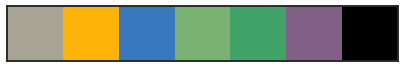

In [1]:
import sys
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import itertools

import seaborn as sns
sns.set(style="white", context="talk")
custom_palette = [ "greyish", "amber", "windows blue", "faded green", "greenish", 
                    "dusty purple","black" ] #"green blue", "dull green", "faded green",  
sns.set_palette(sns.xkcd_palette(custom_palette))
current_palette = sns.color_palette()
%matplotlib inline
sns.palplot(current_palette)

from utils import *

# Pol vs. Budget


################
tw
initial 0.16642399
best 1.1759825686183226e-05
opt_max_dis 0.01714466
opt_max_grad 0.01521546
opt_max_fiedler_diff 0.06293667

################
rd
initial 0.00527844
best 3.1362664859181255e-06
opt_max_dis 0.00031125
opt_max_grad 0.00028454
opt_max_fiedler_diff 0.00082917

################
er
initial 0.00787480432814251
best 0.00016809592279475432
opt_max_dis 0.00418152008641399
opt_max_grad 0.004133134027299079
opt_max_fiedler_diff 0.006312565885431639

################
sbm
initial 0.022894377055875076
best 0.00026548813482769445
opt_max_dis 0.0069405492965114585
opt_max_grad 0.006864411304252796
opt_max_fiedler_diff 0.0072063354632361425

################
pa
initial 0.8460687902461315
best 0.0001630164858874648
opt_max_dis 0.3158627099752136
opt_max_grad 0.3113299270962557
opt_max_fiedler_diff 0.6000689848387835


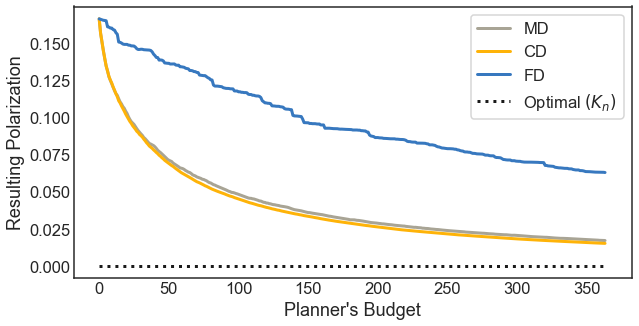

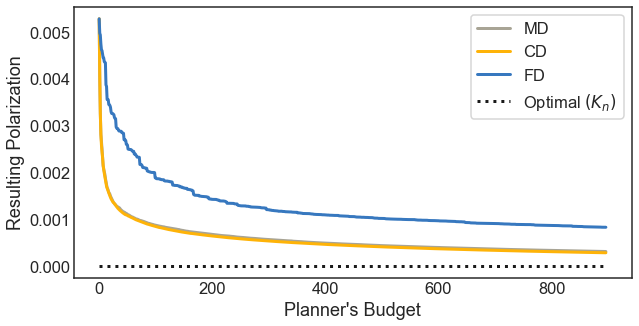

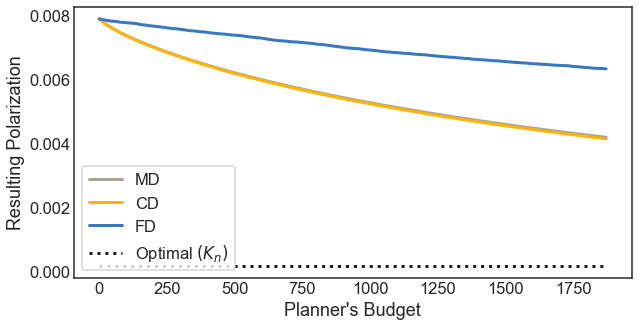

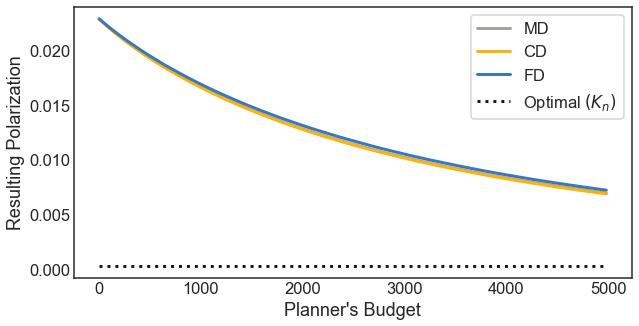

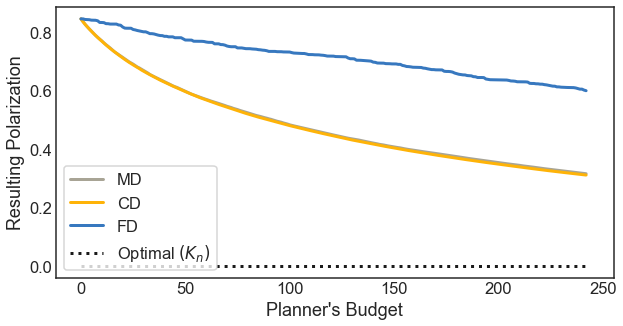

In [29]:
legend = {'opt_max_dis': 'MD', 'opt_max_grad_dis_ratio': r'Max. $\frac{\partial_{w_{ij}}P(\mathbf{z})}{(z_i - z_j)^2}$',
          'opt_max_grad': 'CD', 'opt_max_fiedler_diff': 'FD'}

names = {'rd': 'Reddit', 'tw': 'Twitter', 'er': 'Erdös-Rényi',
         'sbm': 'Stochastic Block', 'pa': 'Preferential Attachment'}

plt.rcParams.update({'font.size': 30, 'axes.linewidth': 1.5 })

colors = ["#ef476f",#"#ffd166",
          "#06d6a0","#118ab2","#073b4c"]


for name in ['tw', 'rd', 'er', 'sbm',
             'pa']:

    print('\n################\n'+name)
    data = pd.read_csv('data/out/raw/'+name+'.csv', index_col = 0)

    df = process_df_cols(data, ['pol_vec', 's'])

    # Remove column of poor-performing optimization heuristic
    df = df.loc[df.type != 'opt_max_grad_dis_ratio']

    
    f,ax = plt.subplots(figsize = (10,5))
    #plt.yscale('log')

    K_n = make_erdos_renyi(len(df.s[0]),1, weighted = False)
    s = np.transpose(np.array([df.s[0]])) - np.mean(df.s[0])
    
    pol_K_n = get_measure(K_n,s,'pol')
    
    ax.hlines(y=pol_K_n, xmin = 0, xmax = len(df.pol_vec[0]),
              linestyle=':', linewidth = 3, color = 'k',
              label = 'Optimal $(K_n)$')
    
    pol_K_0 = np.var(df.s.iloc[0])*len(df.s.iloc[0])
    
    '''
    ax.hlines(y=pol_K_0, xmin = 0, xmax = len(df.pol_vec[0]),
              linestyle=':', linewidth = 3, color = 'g',
              label = 'Innate Polarization')
    '''
    print('initial', df.pol_vec.iloc[0][0])
    print('best', pol_K_n)
    #print('worst', pol_K_0)
        
    for i in range(len(df)):
        
        print(df.type.iloc[i], df.pol_vec.iloc[i][len(df.pol_vec.iloc[i])-1])
        
        plt.plot(df.pol_vec.iloc[i],# color = colors[i],
                 label = legend[df.type.iloc[i]], linewidth = 3)
#        plt.plot(np.array(df.pol_vec.iloc[i])/df.pol_vec.iloc[i][0],
#                 label = legend[df.type.iloc[i]], linewidth = 3)

    
    K_n = make_erdos_renyi(len(df.s[0]),1, weighted = False)
    s = np.transpose(np.array([df.s[0]])) - np.mean(df.s[0])
    
    pol_K_n = get_measure(K_n,s,'pol')
    
        
    ax.tick_params(direction = 'in', width = 1.5)
    plt.legend()#loc = 'lower left')
    plt.xlabel('Planner\'s Budget')#, $k$')
    plt.ylabel('Resulting Polarization')#, $P(\mathbf{z}\')$')
#    plt.ylabel(r'Fraction of Remaining Polarization, $\frac{P(\mathbf{z}\')}{P(\mathbf{z})}$')
#    plt.title('Performance of Polarization-Minimizing Heuristics for '+names[name]+ ' Network',
#             position = (0.5,0.9))
    #plt.title(names[name],
    #         position = (0.5,0.91))

    
    plt.savefig('fig/'+name+'_pol.pdf', bbox_inches = 'tight')

# Initial and Final Graphs

In [2]:
cmap = matplotlib.cm.get_cmap('RdBu')
#cmap = matplotlib.cm.get_cmap('cool')
edge_color = '#222222'
width = 0.2
node_size = 100

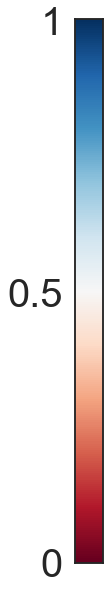

In [3]:
fig,ax = plt.subplots(figsize = (0.5,10))
gradient = np.flip(np.linspace(0, 1, 256))
gradient = np.vstack((gradient, gradient))
plt.imshow(np.transpose(gradient), aspect='auto', cmap=cmap)
plt.gca().axes.get_xaxis().set_visible(False)
plt.yticks([0,128,255], [1,0.5,0], fontsize = 40)
plt.savefig('fig/colormap.pdf', bbox_inches='tight', pad_inches=0.1)

In [6]:
savefig = False
plot = False


legend = {'opt_max_dis': 'Max. Disagreement', 'opt_max_grad': 'Coordinate Descent',
          'opt_max_fiedler_diff': 'Robust'}

names = {'rd': 'Reddit', 'tw': 'Twitter', 'er': 'Erdös-Rényi',
         'sbm': 'Stochastic Block', 'pa': 'Preferential Attachment'}

plt.rcParams.update({'font.size': 15, 'axes.linewidth': 1.5 })


for name in ['tw', 'rd', 'er', 'sbm', 'pa']:
    print('\n------------------------------')
    print('Graph: '+name)
    
    assort_innate = dict()
    assort_expr = dict()
    avg_innate_dis = dict()
    avg_expr_dis = dict()
    expr_dis = dict()
    expr_pol = dict()
    spectral_gap = dict()

    
    data = pd.read_csv('data/out/raw/'+name+'.csv', index_col = 0)

    df = process_df_cols(data, ['s', 'G_in', 'G_out'])

    # Remove column of poor-performing optimization heuristic
    df = df.loc[df.type != 'opt_max_grad_dis_ratio']
    
    G_0 = nx.from_numpy_matrix(np.array(df.G_in.iloc[0]))
    
    s = df.s.iloc[0]
    s_dict = dict(zip(np.arange(len(s)),[int(round(item*1000)) for item in s]))
    
    z = np.array(get_expressed(G_0,s)).squeeze().tolist()
    z_dict = dict(zip(np.arange(len(z)),[int(round(item*1000)) for item in z]))
    
    nx.set_node_attributes(G_0, s_dict, "innate")
    nx.set_node_attributes(G_0, z_dict, "expressed")

    
    assort_innate['initial'] = str(round(nx.numeric_assortativity_coefficient(G_0,'innate'),3))
    assort_expr['initial'] = str(round(nx.numeric_assortativity_coefficient(G_0,'expressed'),3))
    avg_innate_dis['initial'] = str(round(get_measure(G_0,s,'innate_dis')/len(G_0.edges()),3))
    avg_expr_dis['initial'] = str(round(get_measure(G_0,s,'dis')/len(G_0.edges()),8))
    expr_dis['initial'] = str(round(get_measure(G_0,s,'dis'),3))
    expr_pol['initial'] = str(round(get_measure(G_0,s,'pol'),5))
    spectral_gap['initial'] = str(round(get_measure(G_0,s,'spectral_gap'),3))

    
    print('n = '+str(len(G_0.nodes())))
    print('m = '+str(len(G_0.edges())))

    

    if plot:
        f,ax = plt.subplots(figsize = (10,10))
        ax.axis('off')
        nx.draw_networkx(G_0, pos = nx.spring_layout(G_0, seed = 0), 
                         node_color = s, vmax = 1, vmin = 0, cmap = cmap, edge_color = edge_color,
                         width = width, node_size = node_size, with_labels = False, edgecolors = 'k')

        if savefig:
            #plt.savefig('fig/'+name+'_G_in.pdf')
            plt.savefig('fig/'+name+'_G_in.png', dpi = 200)




    for i in range(len(df)):
        G_tmp = nx.from_numpy_matrix(np.array(df.G_out.iloc[i]))
        
        if i == 0:
            print('k = '+str(len(G_tmp.edges()) - len(G_0.edges())))

        
        z_tmp = np.array(get_expressed(G_tmp,s)).squeeze().tolist()
        z_dict_tmp = dict(zip(np.arange(len(z_tmp)),[int(round(item*1000)) for item in z_tmp]))
        
        nx.set_node_attributes(G_tmp, s_dict, "innate")
        nx.set_node_attributes(G_tmp, z_dict, "expressed")

        assort_innate[df.type.iloc[i]] = str(round(nx.numeric_assortativity_coefficient(G_tmp,'innate'),3))
        assort_expr[df.type.iloc[i]] = str(round(nx.numeric_assortativity_coefficient(G_tmp,'expressed'),3))
        avg_innate_dis[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'innate_dis')/len(G_tmp.edges()),3))
        avg_expr_dis[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'dis')/len(G_tmp.edges()),8))
        expr_dis[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'dis'),3))
        expr_pol[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'pol'),5))
        spectral_gap[df.type.iloc[i]] = str(round(get_measure(G_tmp,s,'spectral_gap'),3))




        if plot:
            f,ax = plt.subplots(figsize = (10,10))
            ax.axis('off')
            nx.draw_networkx(G_tmp, pos = nx.spring_layout(G_tmp, seed = 0), 
                         node_color = s, vmax = 1, vmin = 0, cmap = cmap, edge_color = edge_color,
                         width = width, node_size = node_size, with_labels = False, edgecolors = 'k')

            if savefig:
                #plt.savefig('fig/'+name+'_G_out_'+df.type.iloc[i]+'.pdf')
                plt.savefig('fig/'+name+'_G_out_'+df.type.iloc[i]+'.png', dpi = 200)
    
    
    
    print('Assortativity (Innate) Measurements:')
    for key in assort_innate:
        print('       '+key+': '+assort_innate[key])
        
    print('Assortativity (Expressed) Measurements:')
    for key in assort_expr:
        print('       '+key+': '+assort_expr[key])
        
    print('Avg. Innate Disagreement Measurements:')
    for key in avg_innate_dis:
        print('       '+key+': '+avg_innate_dis[key])
        
    print('Avg. Expressed Disagreement Measurements:')
    for key in avg_expr_dis:
        print('       '+key+': '+avg_expr_dis[key])
        
    print('Expressed Disagreement Measurements:')
    for key in expr_dis:
        print('       '+key+': '+expr_dis[key])

    print('Expressed Polarization Measurements:')
    for key in expr_pol:
        print('       '+key+': '+expr_pol[key])
        
    print('Spectral Gap Measurements:')
    for key in spectral_gap:
        print('       '+key+': '+spectral_gap[key])
        


------------------------------
Graph: tw
n = 548
m = 3638
k = 363
Assortativity (Innate) Measurements:
       initial: 0.023
       opt_max_dis: -0.176
       opt_max_grad: -0.109
       opt_max_fiedler_diff: 0.026
Assortativity (Expressed) Measurements:
       initial: 0.629
       opt_max_dis: -0.002
       opt_max_grad: 0.053
       opt_max_fiedler_diff: 0.473
Avg. Innate Disagreement Measurements:
       initial: 0.012
       opt_max_dis: 0.021
       opt_max_grad: 0.018
       opt_max_fiedler_diff: 0.012
Avg. Expressed Disagreement Measurements:
       initial: 0.00010679
       opt_max_dis: 4.501e-05
       opt_max_grad: 4.801e-05
       opt_max_fiedler_diff: 8.148e-05
Expressed Disagreement Measurements:
       initial: 0.388
       opt_max_dis: 0.18
       opt_max_grad: 0.192
       opt_max_fiedler_diff: 0.326
Expressed Polarization Measurements:
       initial: 0.16642
       opt_max_dis: 0.01714
       opt_max_grad: 0.01522
       opt_max_fiedler_diff: 0.06294
Spectral Gap M